In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('House Price India.csv')

In [3]:
data.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
1,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
2,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
3,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
4,6762813105,42491,3,2.50,2600,4750,1.0,0,0,4,...,1951,0,122007,52.9133,-114.590,2380,4750,1,67,790000


In [4]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14619 entries, 0 to 14618
Data columns (total 23 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     14619 non-null  int64  
 1   Date                                   14619 non-null  int64  
 2   number of bedrooms                     14619 non-null  int64  
 3   number of bathrooms                    14619 non-null  float64
 4   living area                            14619 non-null  int64  
 5   lot area                               14619 non-null  int64  
 6   number of floors                       14619 non-null  float64
 7   waterfront present                     14619 non-null  int64  
 8   number of views                        14619 non-null  int64  
 9   condition of the house                 14619 non-null  int64  
 10  grade of the house                     14619 non-null  int64  
 11  Ar

In [6]:
stats = data['Price'].describe().reset_index()
stats['Price'] = round(stats['Price'],2)
stats

,index,Price
0,count,14619.00
1,mean,538806.28
2,std,367229.36
3,min,78000.00
4,25%,320000.00
5,50%,450000.00
6,75%,645000.00
7,max,7700000.00


In [7]:
data.isna().sum().sum()

0

In [8]:
data.duplicated().sum()

0

In [9]:
data.dropna(inplace=True)

In [10]:
data.drop_duplicates(inplace=True)

In [11]:
import matplotlib.pyplot as plt

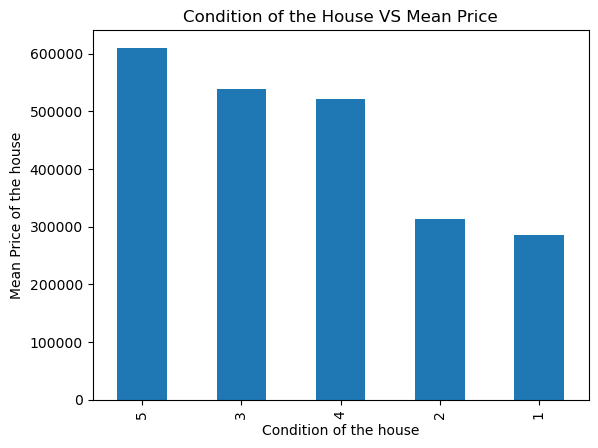

In [12]:
data.groupby('condition of the house')['Price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Condition of the House VS Mean Price')
plt.ylabel('Mean Price of the house')
plt.xlabel('Condition of the house')
plt.show()

In [13]:
data.columns

Index(['id', 'Date', 'number of bedrooms', 'number of bathrooms',
       'living area', 'lot area', 'number of floors', 'waterfront present',
       'number of views', 'condition of the house', 'grade of the house',
       'Area of the house(excluding basement)', 'Area of the basement',
       'Built Year', 'Renovation Year', 'Postal Code', 'Lattitude',
       'Longitude', 'living_area_renov', 'lot_area_renov',
       'Number of schools nearby', 'Distance from the airport', 'Price'],
      dtype='object')

In [14]:
import numpy as np
X = data[['number of bedrooms','number of bathrooms','living area','condition of the house','Number of schools nearby']]
Y = data[['Price']]
X = np.array(X)
Y = np.array(Y)

In [15]:
from sklearn.model_selection import train_test_split 

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [17]:
X_train.shape

(11695, 5)

In [18]:
from sklearn.model_selection import GridSearchCV

In [19]:
from sklearn.tree import DecisionTreeRegressor 

param_grid = {
    'criterion': ['mse','friedman_mse','mae'],
    'splitter': ['best','random'],
    'max_depth': [None,10,20,30,40,50],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,4]
}

In [20]:
tree_model = DecisionTreeRegressor()

In [21]:
grid_tree = GridSearchCV(estimator=tree_model, param_grid=param_grid)

In [22]:
grid_tree.fit(X,Y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1080 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.11/site

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [None, 10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [23]:
grid_tree.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'splitter': 'random'}

In [24]:
tree_preds = grid_tree.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(Y_test, tree_preds)

54674347608.68408

In [26]:
from sklearn.linear_model import LinearRegression 

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train,Y_train)

LinearRegression()

In [29]:
predslr = lr.predict(X_test)

In [30]:
mean_squared_error(Y_test,predslr)

67817344400.20019

In [31]:
from sklearn.ensemble import RandomForestRegressor 

rfrmodel = RandomForestRegressor()

In [32]:
param_gridrfr = {
    'max_depth': [5,10,15],
    'n_estimators': [2,3,4,5,6,7,8,9,10]
}

In [33]:
gridrfr = GridSearchCV(rfrmodel, param_gridrfr)


In [34]:
gridrfr.fit(X_train,Y_train)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,),

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [35]:
gridrfr.best_params_

{'max_depth': 5, 'n_estimators': 9}

In [36]:
rfrpredictions = gridrfr.predict(X_test)

In [37]:
mean_squared_error(Y_test, rfrpredictions)

59521584103.1682

In [38]:
# from sklearn.metrics import accuracy_score 

# accuracy_score(Y_test, predslr)

# decisiontreeregressor_accuracy = accuracy_score(Y_test, tree_preds)
# linearregression_accuracy = accuracy_score(Y_test, predslr)
# randomforestregressor_accuracy = accuracy_score(Y_test, rfrpredictions)

# # print('Accuracy of Decision Tree Regressor is: ', decisiontreeregressor_accuracy)
# print('Accuracy of Linear Regression is: ', linearregression_accuracy)
# print('Accuracy of Random Forest Regressor is: ', randomforestregressor_accuracy)


In [39]:
gridrfr 

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [5, 10, 15],
                         'n_estimators': [2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [40]:
import joblib 
joblib.dump(gridrfr, 'model.pkl')

['model.pkl']